# Chapter 1 Laboratory

In this laboratory, the authors of the book introduce R and R Studio. Since we are doing the practical tasks in Python, that is what I am going to use.

In [2]:
%matplotlib inline

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from pathlib import Path

Let's dig into the `arbuthnot` dataset.

In [5]:
arbuthnot_path = Path("../datasets/arbuthnot.csv")
arbuthnot_df = pd.read_csv(arbuthnot_path)

# Let's "glimpse" on the dataset
display(arbuthnot_df.head())

,year,boys,girls
0,1629,5218,4683
1,1630,4858,4457
2,1631,4422,4102
3,1632,4994,4590
4,1633,5158,4839


### Exercise 1 - What command would you use to extract just the counts of girls baptized?

`arbuthnot_df["girls"]`

Let's do some data visualization.

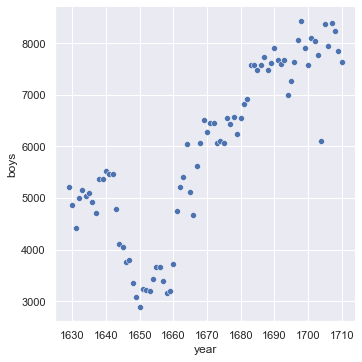

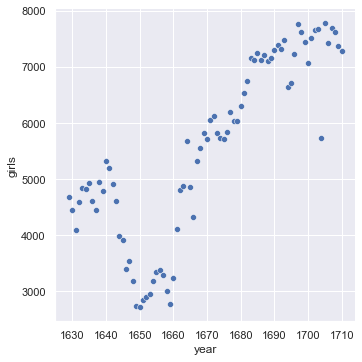

In [8]:
sns.set_theme(style="darkgrid")

sns.relplot(x="year", y="boys", data=arbuthnot_df)

### Exercise 2 - Is there an apparent trend in the number of girls baptized over the years? How would you describe it? (To ensure that your lab report is comprehensive, be sure to include the code needed to make the plot as well as your written interpretation.)

It appears that from 1630 to 1640 the number of girls baptized increased, to the dicrease until 1650, after which we had a quite steady increase, though nonlinear.

Let's add the `total` to the dataframe.

In [9]:
arbuthnot_df["total"] = arbuthnot_df["boys"] + arbuthnot_df["girls"]

And now let's plot this new variable.

<AxesSubplot:xlabel='year', ylabel='total'>

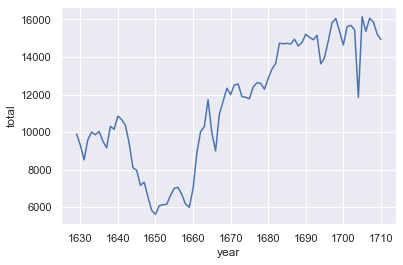

In [10]:
sns.lineplot(x="year", y="total", data=arbuthnot_df)

### Exercise 3 - Now, generate a plot of the proportion of boys born over time. What do you see?

I can see that the proportion of boys is roughly 0.5 throughout the period of the dataset.

<AxesSubplot:xlabel='year'>

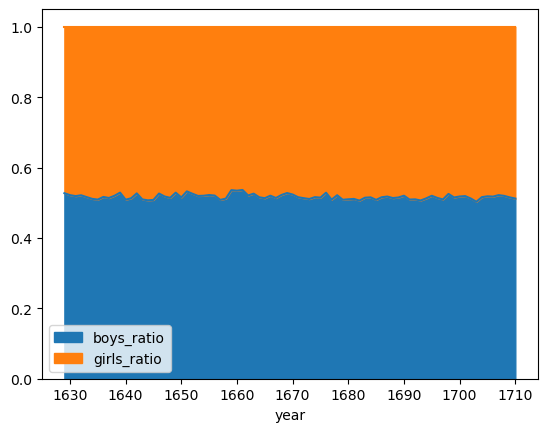

In [22]:
arbuthnot_df["boys_ratio"] = arbuthnot_df["boys"] / arbuthnot_df["total"]
arbuthnot_df["girls_ratio"] = arbuthnot_df["girls"] / arbuthnot_df["total"]

plt.style.use("default")
arbuthnot_df[["boys_ratio", "girls_ratio", "year"]].plot.area(x="year")

### Exercise 4 - What years are included in this data set? What are the dimensions of the data frame? What are the variable (column) names?

Let's display these info. We are now using the `present` dataset.

In [32]:
present_path = Path("../datasets/present.csv")

arbuthnot_df = pd.read_csv(arbuthnot_path)
present_df = pd.read_csv(present_path)

print(present_df["year"].unique().tolist())
print(present_df.shape)
print(present_df.columns.tolist())

[1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002]
(63, 3)
['year', 'boys', 'girls']


### Exercise 5 - How do these counts compare to Arbuthnot’s? Are they of a similar magnitude?

As we can see, in the the former we have 82 years where in the latter just 62.

In [36]:
print(arbuthnot_df["year"].unique().tolist())
print(arbuthnot_df.shape)
print(arbuthnot_df.columns.tolist())

[1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 1663, 1664, 1665, 1666, 1667, 1668, 1669, 1670, 1671, 1672, 1673, 1674, 1675, 1676, 1677, 1678, 1679, 1680, 1681, 1682, 1683, 1684, 1685, 1686, 1687, 1688, 1689, 1690, 1691, 1692, 1693, 1694, 1695, 1696, 1697, 1698, 1699, 1700, 1701, 1702, 1703, 1704, 1705, 1706, 1707, 1708, 1709, 1710]
(82, 3)
['year', 'boys', 'girls']


### Exercise 6 - Make a plot that displays the proportion of boys born over time. What do you see? Does Arbuthnot’s observation about boys being born in greater proportion than girls hold up in the U.S.? Include the plot in your response. Hint: You should be able to reuse your code from Exercise 3 above, just replace the name of the data frame.

Unlike the former dataframe, here we can see that the proportion is still 0.5 without any apparent fluctuation.

<AxesSubplot:xlabel='year'>

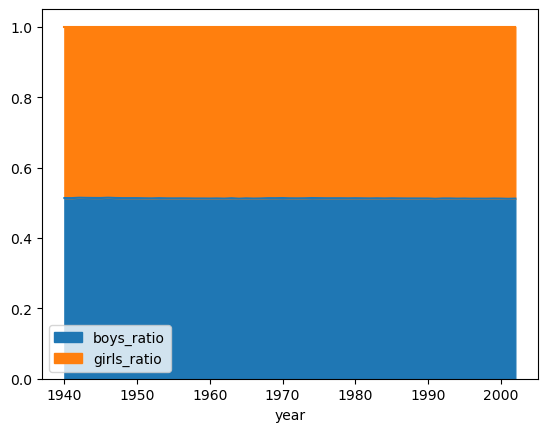

In [38]:
present_df["boys_ratio"] = present_df["boys"] / (present_df["boys"] + present_df["girls"])
present_df["girls_ratio"] = present_df["girls"] / (present_df["boys"] + present_df["girls"])

plt.style.use("default")
present_df[["boys_ratio", "girls_ratio", "year"]].plot.area(x="year")

### Exercise 7 - In what year did we see the most total number of births in the U.S.? Hint: First calculate the totals and save it as a new variable. Then, sort your dataset in descending order based on the total column. You can do this interactively in the data viewer by clicking on the arrows next to the variable names. To include the sorted result in your report you will need to use two new functions. First we use `arrange()` to sorting the variable. Then we can arrange the data in a descending order with another function, `desc()`, for descending order. The sample code is provided below.

Again, we are using python and its ways of finding out such informations, which makes use of fancy indexing. We can see that in 1961 we got the max number of births.

In [41]:
present_df["total"] = present_df["boys"] + present_df["girls"]

print(present_df[present_df["total"] == max(present_df["total"])]["year"].values[0])

1961
